# Data Clearning
異常値が多いんで，改善します．

# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

In [2]:
!cd /home/masa1357/git/Credit-Score-Classification-Starter
train_df = pd.read_csv('./data/input/train.csv', index_col=0, low_memory=False)
test_df = pd.read_csv('./data/input/test.csv', index_col=0, low_memory=False)

In [3]:
df = pd.concat([train_df.drop(['Poor_Credit_Score'], axis=1), test_df])
#df = train_df

<h1>データの可視化</h1>
データを可視化して，どんな感じなのか考える．

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  int64  
 4   SSN                       100000 non-null  object 
 5   Occupation                92938 non-null   object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  int64 

# 異常値のある列を抽出

In [5]:
for col in df.columns:
    if df['Monthly_Balance'].dtype == 'object':  # check if column type is object
        df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')  # replace non-numeric values with NaN
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)


In [6]:
# 異常値がある列のリスト
columns_with_outliers = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 
                         'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
                         'Num_Credit_Inquiries', 'Total_EMI_per_month','Monthly_Balance']

# 新しいデータフレームを作成
df_new = df[columns_with_outliers]
df_new


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Total_EMI_per_month,Monthly_Balance
ID,,,,,,,,,,
1,27,56714.52,7,10,29,4,19.0,12.0,165.335553,394.600682
2,28,56714.52,7,10,29,4,19.0,13.0,165.335553,467.337568
3,28,56714.52,7,10,29,4,21.0,13.0,165.335553,246.114461
4,28,56714.52,7,10,29,4,19.0,13.0,165.335553,NaN
5,28,56714.52,703,10,29,4,20.0,13.0,165.335553,429.775133
...,...,...,...,...,...,...,...,...,...,...
99996,51,110468.49,0,7,7,1,6.0,2.0,52.458223,260.180778
99997,51,110468.49,0,7,7,1,4.0,2.0,52.458223,954.274659
99998,51,110468.49,0,7,7,1,3.0,2.0,52.458223,819.253337


In [7]:
df.describe()


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,91216.000000,98791.000000
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,195.539456,402.551258
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,72.236692,270.106630
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,128.954538,336.731225
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519


In [8]:
outlier_counts = {}

for column in df_new.columns:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

for column, count in outlier_counts.items():
    print(f"{column} has {count} outliers.",end='\t\t\t\t\t')
    print(f"{column} has {count/70000}% outliers.")


Age has 2781 outliers.					Age has 0.039728571428571426% outliers.
Annual_Income has 1023 outliers.					Annual_Income has 0.014614285714285715% outliers.
Num_Bank_Accounts has 1315 outliers.					Num_Bank_Accounts has 0.018785714285714284% outliers.
Num_Credit_Card has 2271 outliers.					Num_Credit_Card has 0.03244285714285714% outliers.
Interest_Rate has 2034 outliers.					Interest_Rate has 0.029057142857142858% outliers.
Num_of_Loan has 4348 outliers.					Num_of_Loan has 0.06211428571428571% outliers.
Num_of_Delayed_Payment has 736 outliers.					Num_of_Delayed_Payment has 0.010514285714285714% outliers.
Num_Credit_Inquiries has 1650 outliers.					Num_Credit_Inquiries has 0.023571428571428573% outliers.
Total_EMI_per_month has 5196 outliers.					Total_EMI_per_month has 0.07422857142857144% outliers.
Monthly_Balance has 4746 outliers.					Monthly_Balance has 0.0678% outliers.


これらの異常値を何らかの手段によって調整する．

# 決定木による異常値置換

In [9]:
df_nu = df.select_dtypes(include=[np.number])
nan_rows = df_nu.isna().any(axis=1).sum()
print(nan_rows)
df_nu.isnull().sum()

df_nu = df.select_dtypes(include=[np.number])
nan_columns = df_nu.columns[df_nu.isnull().any()]
df_nu = df_nu.drop(columns=nan_columns)
df_nu.columns

31607


Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [10]:
df_nu.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,110.649700,1.764157e+05,17.091280,22.47443,72.466040,3.009960,21.068780,1426.220376,32.285173,1403.118217
std,686.244717,1.429618e+06,117.404834,129.05741,466.422621,62.647879,14.860104,1155.129026,5.116875,8306.041270
min,-500.000000,7.005930e+03,-1.000000,0.00000,1.000000,-100.000000,-5.000000,0.230000,20.000000,0.000000
25%,24.000000,1.945750e+04,3.000000,4.00000,8.000000,1.000000,10.000000,566.072500,28.052567,30.306660
50%,33.000000,3.757861e+04,6.000000,5.00000,13.000000,3.000000,18.000000,1166.155000,32.305784,69.249473
75%,42.000000,7.279092e+04,7.000000,7.00000,20.000000,5.000000,28.000000,1945.962500,36.496663,161.224249
max,8698.000000,2.419806e+07,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4998.070000,50.000000,82331.000000


In [11]:
df_nu.isnull().sum()

Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
dtype: int64

In [12]:
from sklearn.tree import DecisionTreeRegressor


for column in columns_with_outliers:
    print(column)
    if column in df_nu.columns:
        features = df_nu.drop(columns=column)
    else:
        features = df_nu
    
    target = df[column]
    
    
    # Calculate IQR
    Q1 = target.quantile(0.25)
    Q3 = target.quantile(0.75)
    IQR = Q3 - Q1
    # Define outliers as values outside of Q1 - 2*IQR and Q3 + 2*IQR
    mask = (target < (Q1 - 2*IQR)) | (target > (Q3 + 2*IQR)) | target.isnull()
   
    features_with_outliers = features[mask]
    features_without_outliers = features[~mask]
    target_without_outliers = target[~mask]

    # Fit a decision tree model
    model = DecisionTreeRegressor()
    model.fit(features_without_outliers, target_without_outliers)

    # Predict the missing values and fill in the DataFrame
    predicted_values = model.predict(features_with_outliers)
    df_new.loc[mask, column] = predicted_values


Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Num_Credit_Inquiries
Total_EMI_per_month
Monthly_Balance


In [13]:
nan_list = ['Monthly_Inhand_Salary','Changed_Credit_Limit','Amount_invested_monthly'] 

In [14]:
for column in nan_list:
    print(column)
    if column in df_nu.columns:
        features = df_nu.drop(columns=column)
    else:
        features = df_nu
    
    target = df[column]
    mask = target.isnull()
   
    features_with_outliers = features[mask]
    features_without_outliers = features[~mask]
    target_without_outliers = target[~mask]

    # Fit a decision tree model
    model = DecisionTreeRegressor(max_depth=15, min_samples_leaf= 6, min_samples_split= 5, n_estimators= 150)
    model.fit(features_without_outliers, target_without_outliers)

    # Predict the missing values and fill in the DataFrame
    predicted_values = model.predict(features_with_outliers)
    df.loc[mask, column] = predicted_values

Monthly_Inhand_Salary


TypeError: DecisionTreeRegressor.__init__() got an unexpected keyword argument 'n_estimators'

In [ ]:
#for column in df_new.columns:
#    plt.figure(figsize=(10,5))
#    plt.hist(df_new[column], bins=30, color='c', edgecolor='black', alpha=0.7)
#    plt.title(f'Histogram of {column}')
#    plt.xlabel(column)
#    plt.ylabel('Frequency')
#    plt.grid(True)
#    plt.show()

In [ ]:
df.update(df_new)

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.315400,50492.738698,4198.718379,5.369060,5.53365,14.533020,3.533330,21.068780,13.313300,10.387091,5.781460,1426.220376,32.285173,97.487585,196.015646,381.643704
std,10.766747,38264.252175,3187.263644,2.593978,2.06715,8.742774,2.447016,14.860104,6.310945,6.789902,3.862723,1155.129026,5.116875,93.523468,200.349748,171.902082
min,14.000000,7005.930000,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19344.270000,1626.761667,3.000000,4.00000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,28.838541,72.115363,268.654202
50%,33.000000,37002.580000,3096.836667,5.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,65.716934,129.026852,334.606765
75%,42.000000,71681.400000,5961.637500,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,143.316686,237.375858,460.062173
max,56.000000,179317.040000,15204.633330,11.000000,11.00000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,422.793949,1977.326102,870.547888


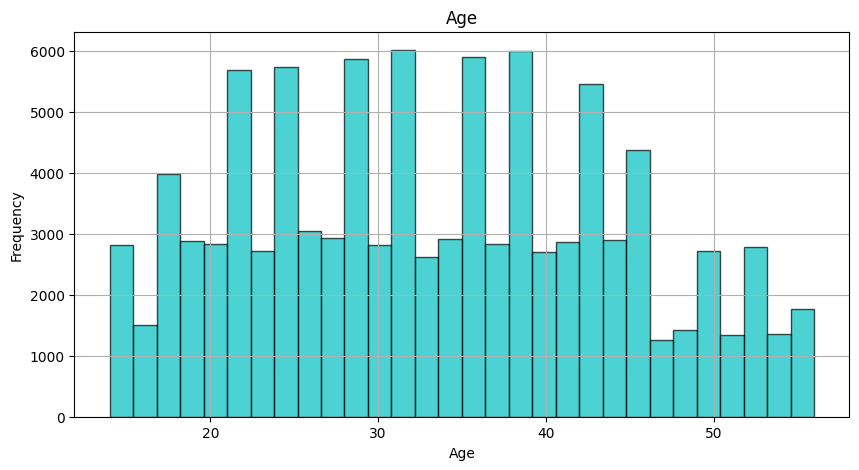

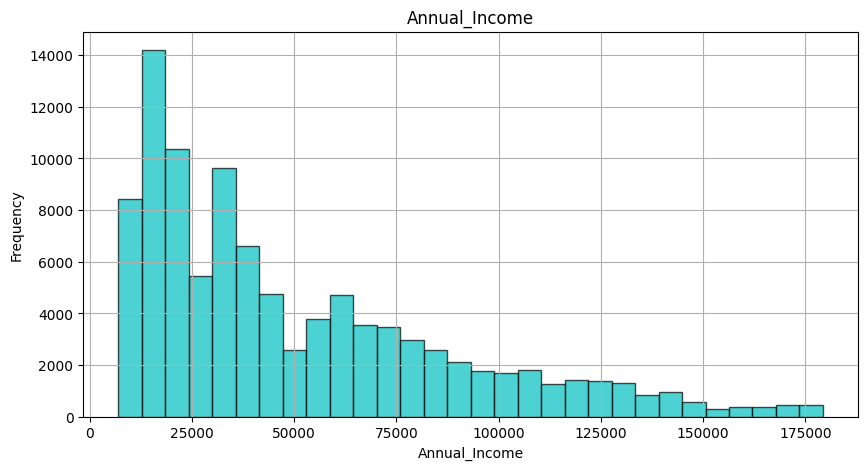

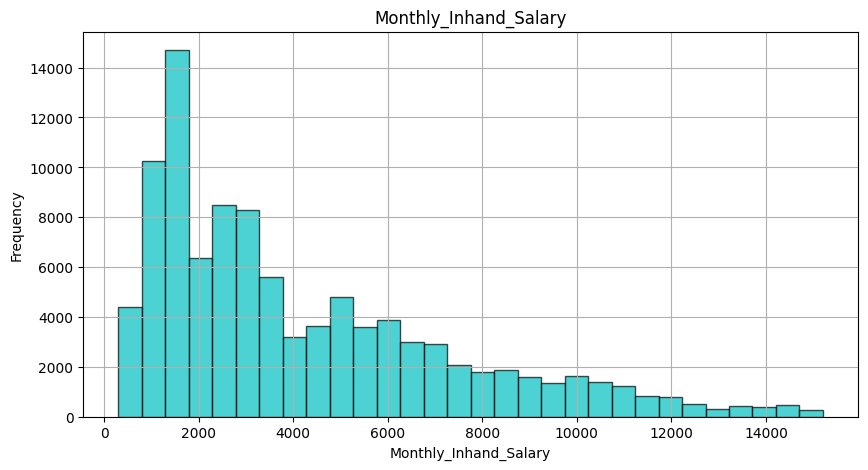

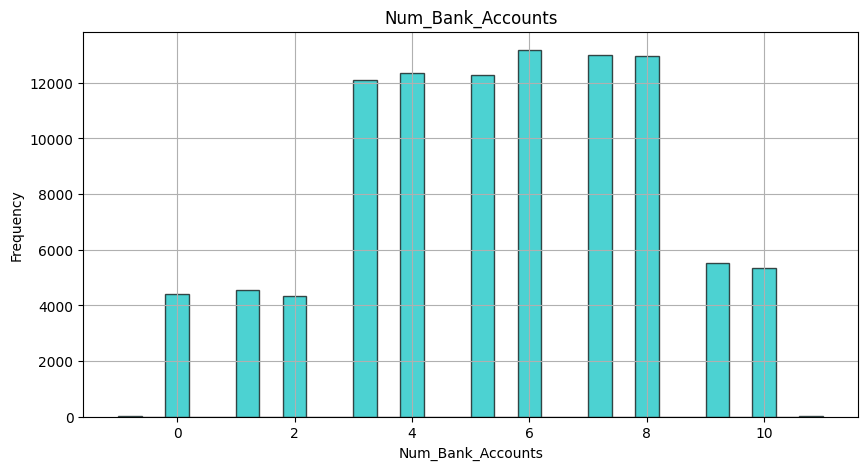

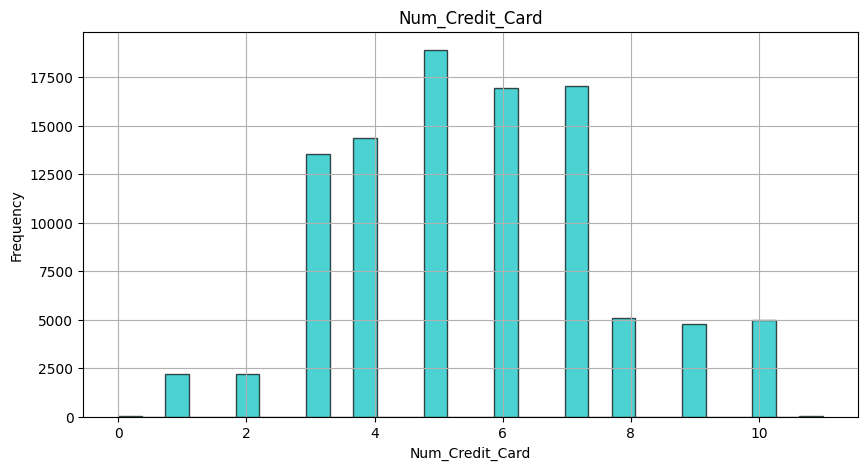

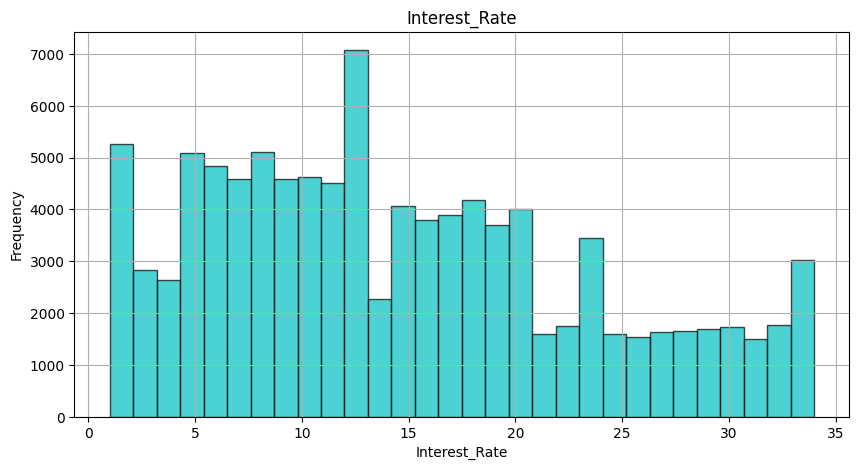

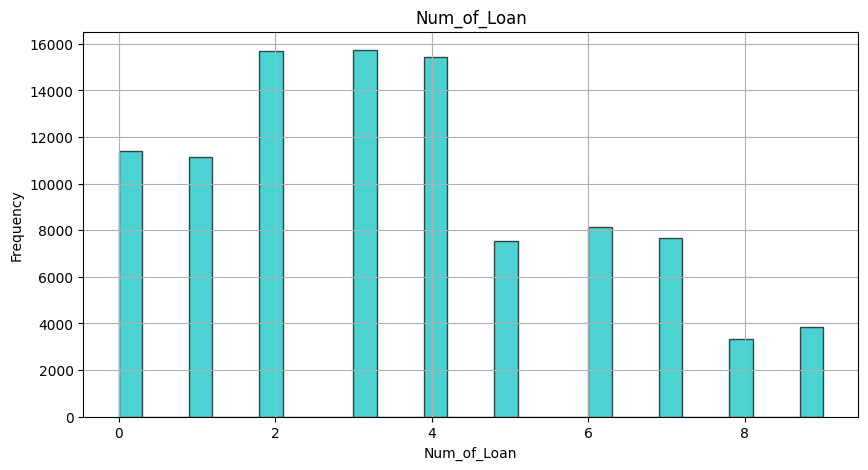

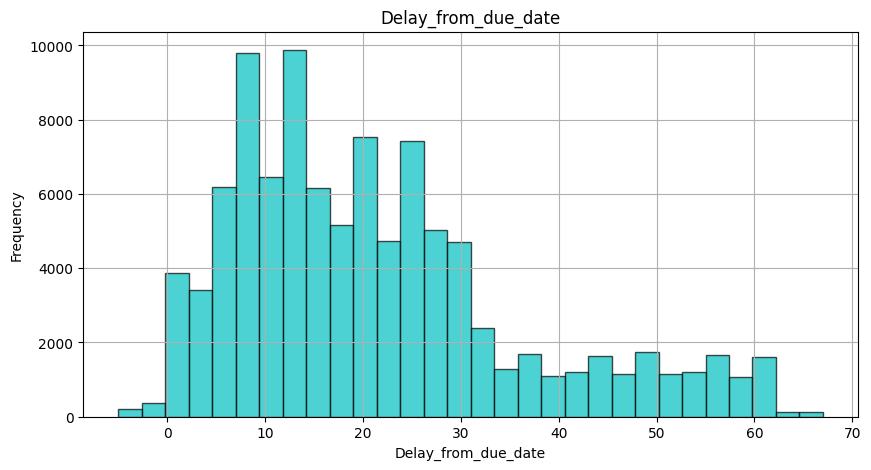

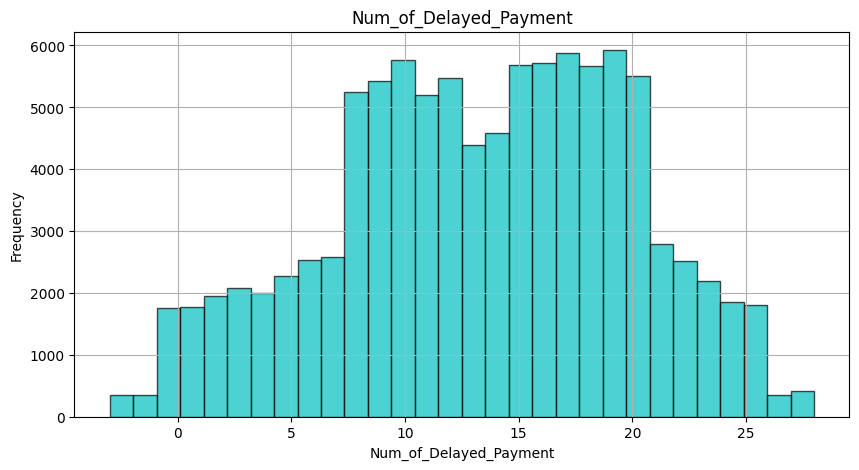

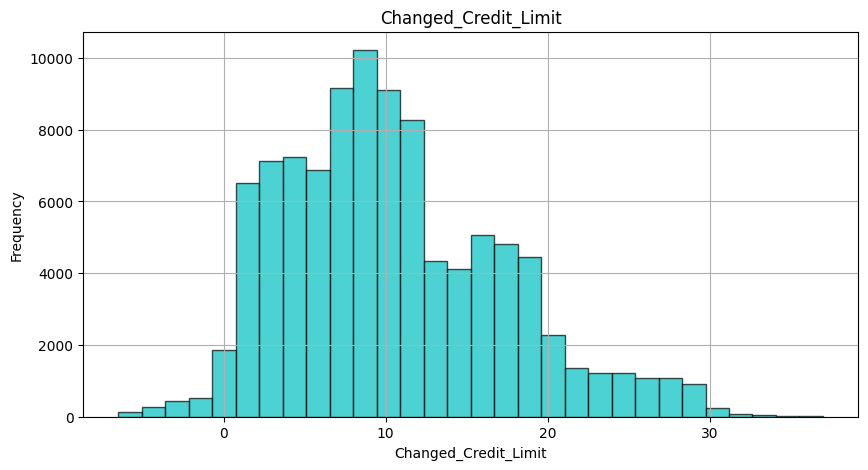

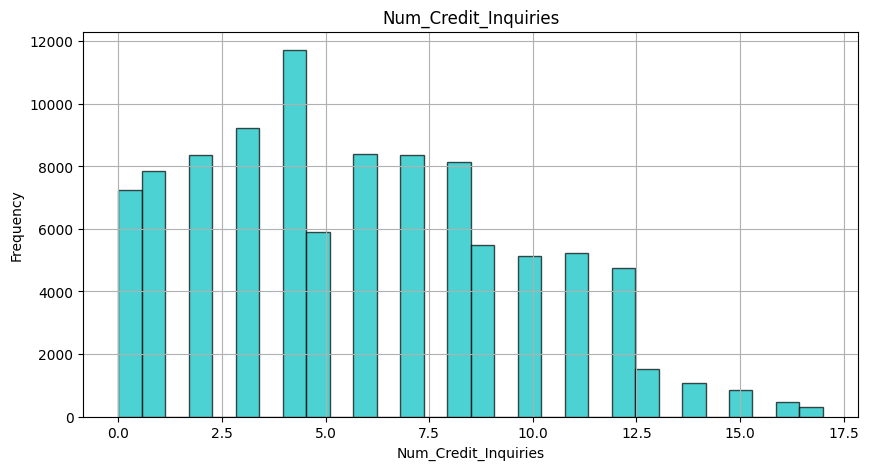

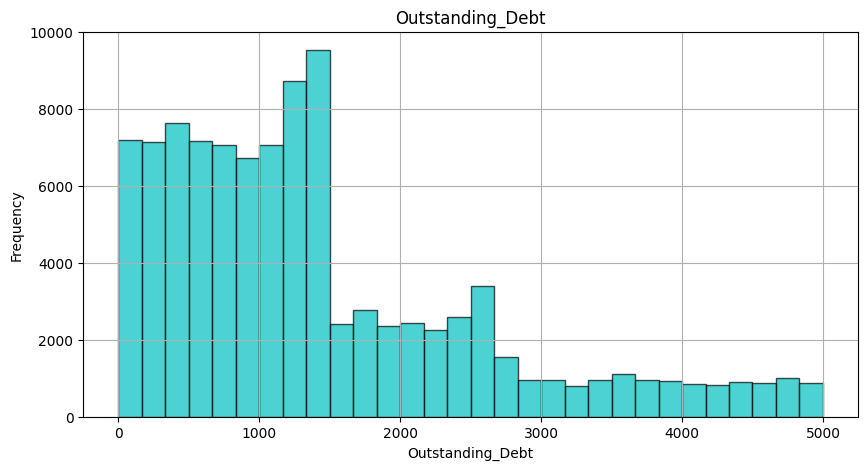

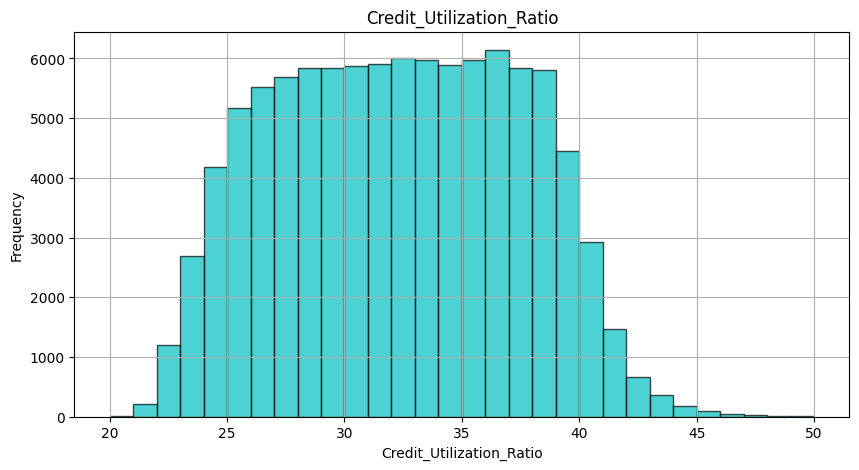

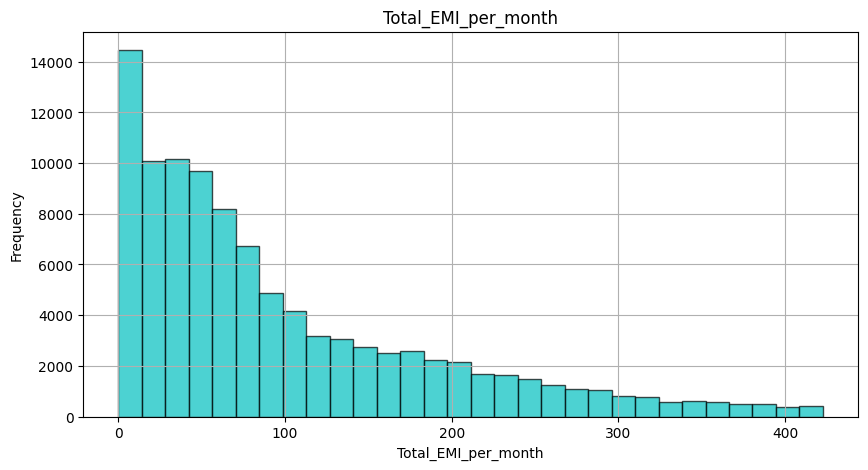

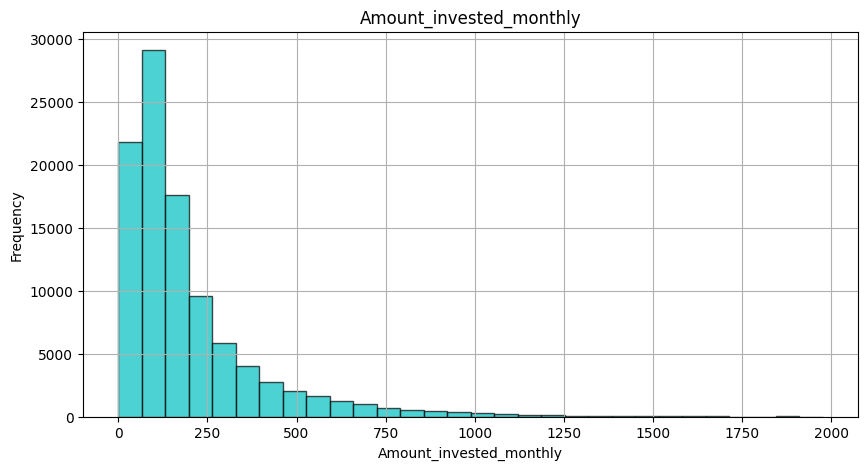

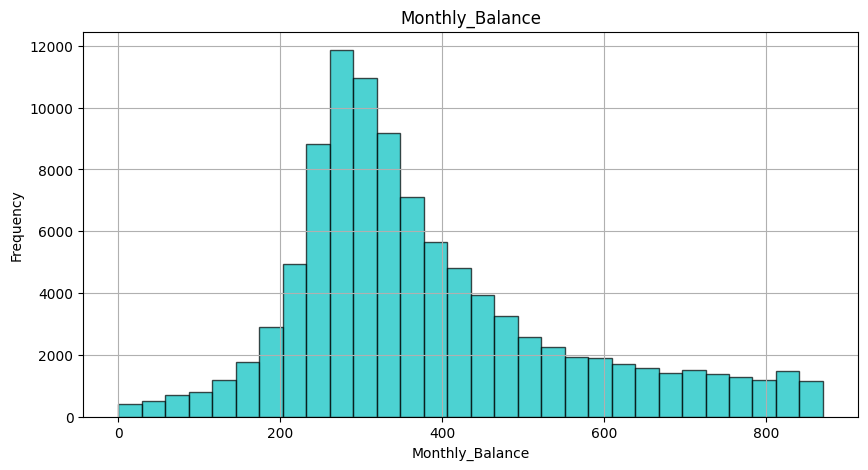

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])

for column in df_numeric.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df_numeric[column], bins=30, color='c', edgecolor='black', alpha=0.7)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Nanの補完

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
nan_columns = [col for col in object_columns if df[col].isnull().any()]

print(nan_columns)

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age']


In [ ]:
df[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                90015 non-null  object
 1   Occupation          92938 non-null  object
 2   Type_of_Loan        88592 non-null  object
 3   Credit_Mix          79805 non-null  object
 4   Credit_History_Age  90970 non-null  object
dtypes: object(5)
memory usage: 4.6+ MB


In [ ]:
for column in nan_columns:
    df[column] = df[column].fillna('hoge')

In [ ]:
df.isnull().sum()

Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.315400,50492.738698,4198.718379,5.369060,5.53365,14.533020,3.533330,21.068780,13.313300,10.387091,5.781460,1426.220376,32.285173,97.487585,196.015646,381.643704
std,10.766747,38264.252175,3187.263644,2.593978,2.06715,8.742774,2.447016,14.860104,6.310945,6.789902,3.862723,1155.129026,5.116875,93.523468,200.349748,171.902082
min,14.000000,7005.930000,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19344.270000,1626.761667,3.000000,4.00000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,28.838541,72.115363,268.654202
50%,33.000000,37002.580000,3096.836667,5.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,65.716934,129.026852,334.606765
75%,42.000000,71681.400000,5961.637500,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,143.316686,237.375858,460.062173
max,56.000000,179317.040000,15204.633330,11.000000,11.00000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,422.793949,1977.326102,870.547888


In [ ]:
df = df[['Month',
         'Age',
         'Annual_Income',
         'Monthly_Inhand_Salary',
         'Num_Bank_Accounts', 
         'Num_Credit_Card',
         'Interest_Rate',
         'Num_of_Loan',
         #'Type_of_Loan', #NEW!
         'Delay_from_due_date',
         'Num_of_Delayed_Payment',#NEW!
         'Changed_Credit_Limit',#NEW!
         'Num_Credit_Inquiries',#NEW!
         'Outstanding_Debt', 
         'Credit_Utilization_Ratio',
         'Payment_of_Min_Amount', 
         'Total_EMI_per_month',
         'Amount_invested_monthly',#NEW!
         'Payment_Behaviour',
         'Monthly_Balance']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  float6

In [ ]:
import matplotlib.pyplot as plt
#for col in df.columns:
#    print(col)
#    plt.hist(df[col], bins = 10)
#    plt.show()

In [ ]:
df = pd.get_dummies(df)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
ID,,,,,,,,,,,,,,,,,,,,,
1,27,56714.52,4561.2100,7,10,29,4,40,19.0,11.64,...,False,False,True,False,False,True,False,False,False,False
2,28,56714.52,4561.2100,7,10,29,4,40,19.0,11.64,...,False,False,True,False,True,False,False,False,False,False
3,28,56714.52,4561.2100,7,10,29,4,40,21.0,11.64,...,True,False,False,False,False,False,False,False,False,True
4,28,56714.52,4561.2100,7,10,29,4,40,19.0,11.64,...,False,False,True,False,False,False,False,False,False,True
5,28,56714.52,4561.2100,7,10,29,4,36,20.0,11.64,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,51,110468.49,8934.7075,0,7,7,1,7,6.0,7.23,...,False,True,False,False,False,False,False,False,False,True
99997,51,110468.49,8934.7075,0,7,7,1,11,4.0,7.23,...,False,True,False,False,True,False,False,False,False,False
99998,51,110468.49,8934.7075,0,7,7,1,7,3.0,13.23,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
nrow, ncol = train_df.shape
print(nrow, ncol)

70000 27


In [ ]:
train_df = df[:nrow].join(train_df['Poor_Credit_Score'])
test_df = df[nrow:]

# 可視化
ここでは、相関係数行列を可視化しただけで、予測モデルには何も反映させていません。
（自分で工夫してください。）

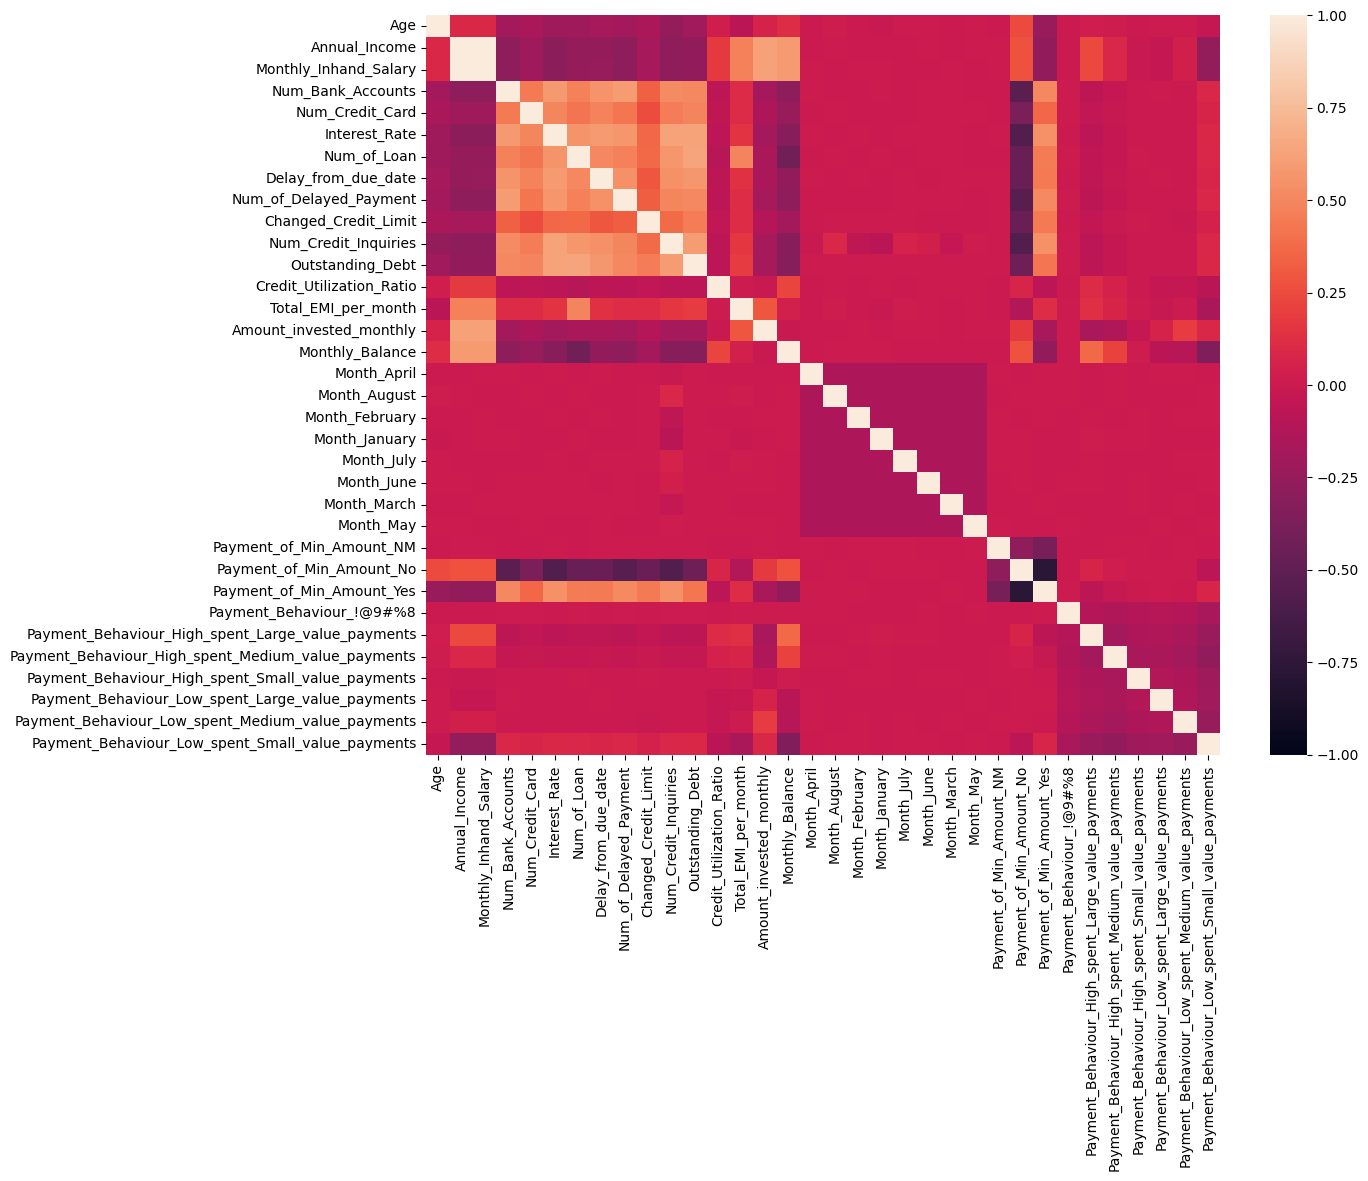

In [ ]:
import seaborn as sns


corr = df.corr()

plt.figure(figsize=(12.8, 9.6))
sns.heatmap(corr, vmin=-1, vmax=1)
plt.show()

# 機械学習
ランダムフォレストでグリッドサーチします．

In [ ]:
X_train = train_df.drop(['Poor_Credit_Score'], axis=1).to_numpy()
y_train = train_df['Poor_Credit_Score'].to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 15, 20, 25],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [2, 4, 6]
}

# グリッドサーチ定義
grid_search = GridSearchCV(rf, param_grid, cv=10)  # 10-fold cross-validation

# グリッドサーチ
grid_search.fit(X_train, y_train)

# 最適パラメータ表示
print('Best parameters:', grid_search.best_params_)

# 最適モデルの取得
model = grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print("K-Fold CV Score: ", scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# データセットを読み込む
# 今回は例としてIrisデータセットを使用します
from sklearn.datasets import load_iris
iris = load_iris()

# 特徴量と目標変数を定義する
X = iris.data
y = iris.target

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを定義
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルを訓練データにフィットさせる
rf.fit(X_train, y_train)

# テストデータを使って予測を行う
y_pred = rf.predict(X_test)

# 予測の精度を評価する
print("Accuracy: ", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print("K-Fold CV Score: ", scores.mean())